In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz #나무구조 시각화
from sklearn.tree import export_graphviz #나무구조 생성 및 저장
from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.tree import DecisionTreeRegressor #예측/회귀: decision tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #최적모델, 파라미터 탐색
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant # qqplot, 회귀분석의 상수항 추가
import statsmodels.formula.api as smf # 선형 모델 함수
import statsmodels.formula.api as smf # 선형 모델 formula
from statsmodels.tools.eval_measures import rmse # 평가함수 
# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm


#Classifier 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#모델 평가함수
from sklearn.metrics import precision_score, recall_score, f1_score,roc_curve,auc


matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_raw = pd.read_csv("/content/drive/MyDrive/Big Data 분석 기초/SCALE불량.csv", encoding = 'euc-kr')
df_raw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [ ]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

### EDA

##### **기술 통계량**

In [ ]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [ ]:
df_raw.describe(include='all')

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
count,720,720,720,720,720,720.000000,720.000000,720.000000,720.000000,720,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720,720.000000,720
unique,720,720,2,66,9,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4
top,PB562774,2021-08-01:08:00:01,양품,JS-SM490YB,C0,NaN,NaN,NaN,NaN,3호기,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,적용,NaN,4조
freq,1,1,489,84,503,NaN,NaN,NaN,NaN,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687,NaN,194
mean,NaN,NaN,NaN,NaN,NaN,29.267857,2807.127778,34323.269444,41481.777778,NaN,...,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,NaN,8.319444,NaN
std,NaN,NaN,NaN,NaN,NaN,19.152651,517.839690,13828.434837,24751.322015,NaN,...,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,NaN,1.623252,NaN
min,NaN,NaN,NaN,NaN,NaN,12.030000,1800.000000,7893.000000,7820.000000,NaN,...,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,NaN,5.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,16.090000,2466.000000,22663.000000,17757.500000,NaN,...,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,NaN,6.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.130000,2725.000000,37380.000000,36120.000000,NaN,...,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,40.000000,3125.000000,43735.000000,61120.000000,NaN,...,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,NaN,10.000000,NaN


In [ ]:
df_raw['SCALE']

0      양품
1      양품
2      양품
3      양품
4      양품
       ..
715    불량
716    양품
717    양품
718    양품
719    양품
Name: SCALE, Length: 720, dtype: object

In [ ]:
df_raw['SCALE'].value_counts()

양품    489
불량    231
Name: SCALE, dtype: int64

In [ ]:
a = (231/720)*100
print("목표변수가('Scale불량') 전체 data에서 차지하는 비율은: %d %%이다." %a)

목표변수가('Scale불량') 전체 data에서 차지하는 비율은: 32 %이다.


In [ ]:
df_raw_num = df_raw[["PT_THICK", "PT_WIDTH","PT_LENGTH","PT_WEIGHT","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP","ROLLING_TEMP_T5","ROLLING_DESCALING"]]

In [ ]:
v_feature_name=df_raw_num.columns
v_feature_name


Index(['PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'ROLLING_DESCALING'],
      dtype='object')

In [ ]:

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_num)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693


#### 이상치를 한번에 보기 위해서 이상치에 민감한 Standard Scaling을 해서 이상치가 있는지 확인

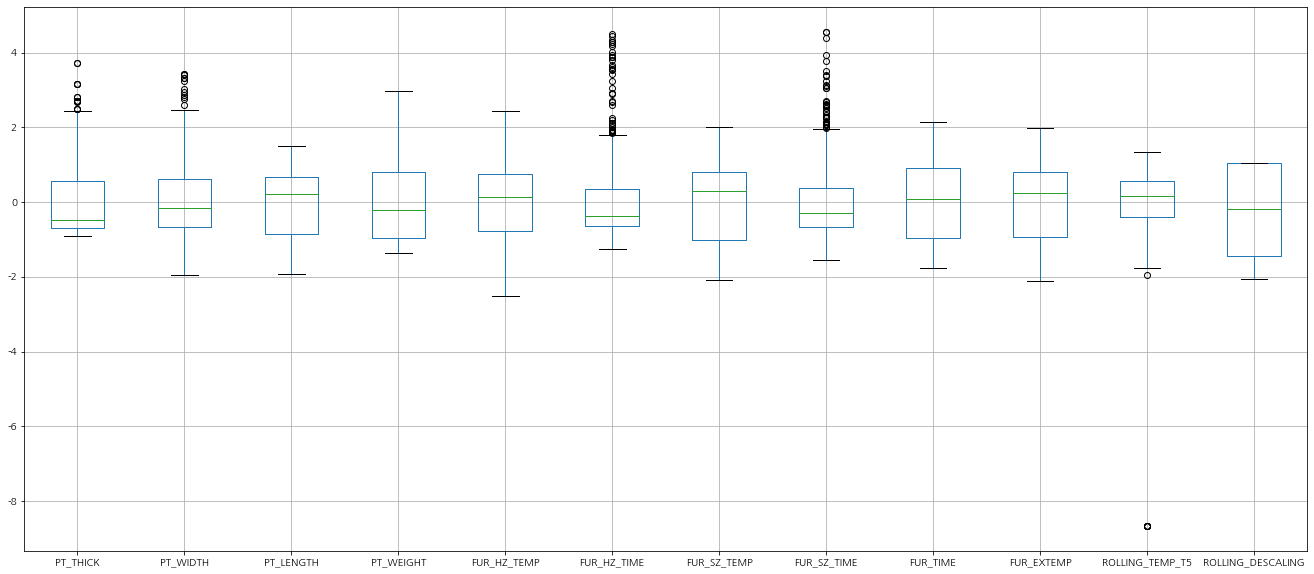

In [ ]:
df_scaled.boxplot(figsize=(23,10))


이상치 있는 것 PT_THICK(Pate 두께), PT_WIDTH(폭), FUR_HZ_TIME(가열로 가열대 시간), FUR_SZ_TIME(가열로 균열대 시간),ROLLING_TEMP(압연온도)
사상압연?   
이제 이상치 처리 하기전에 그래프 보고 할 지 결정하겠음

### **히스토그램 확인**

plt.figure(figsize=(13,5)) 히스토 그램 사이즈 

In [ ]:
def p_plot_hist(data,column_name):
    plt.figure(figsize=(13,5))
    plt.hist(data[data['SCALE'] == '양품'][column_name], label = '양품', alpha =0.5,bins=20)
    plt.hist(data[data['SCALE'] == '불량'][column_name], label = '불량', alpha =0.5,bins=20)
    plt.legend()

##### **PLATE 두께/폭/길이/중량 - 고객사 주문 요청**

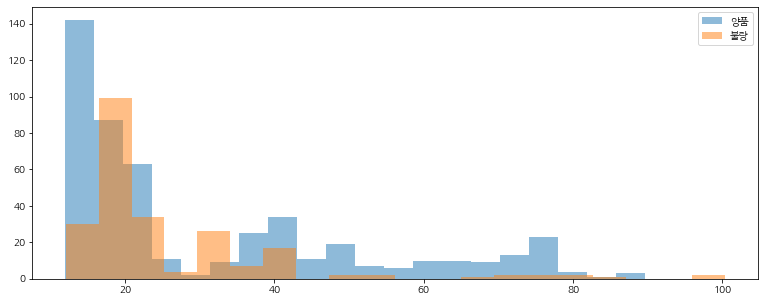

In [ ]:
p_plot_hist(df_raw, 'PT_THICK')
#Plate두께 # 이상치 있음 위로.. 
#

 보면 90 이상이 다 불량인걸로 보아 이상치가 있는거 같음 이건 개선사항(step3)에서 처리해야 할 거같음   
 90 이상은 주문 안받는게 좋은거 같다( 데이터 부족이라서 )

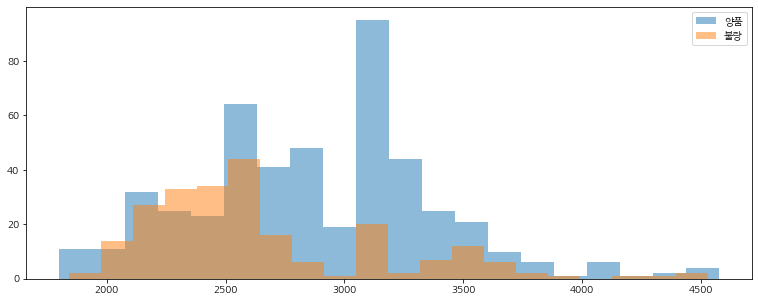

In [ ]:
p_plot_hist(df_raw, 'PT_WIDTH')
#Plate폭이 좁은 (200~2500)사이에는 불량률이 높아 영향 인자로 생각해볼 수 있을 것 같다.
#개선할 수 있는 방법?
#WITH도 위에가 이상치인데 

고객이 원하는 Width라서 이건 이상치가 아닌거 같다

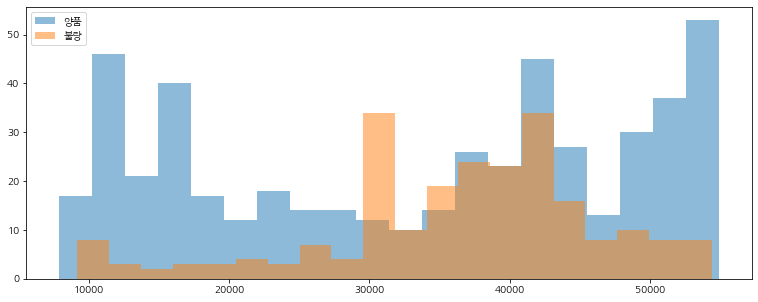

In [ ]:
p_plot_hist(df_raw, 'PT_LENGTH')
#Plate길이

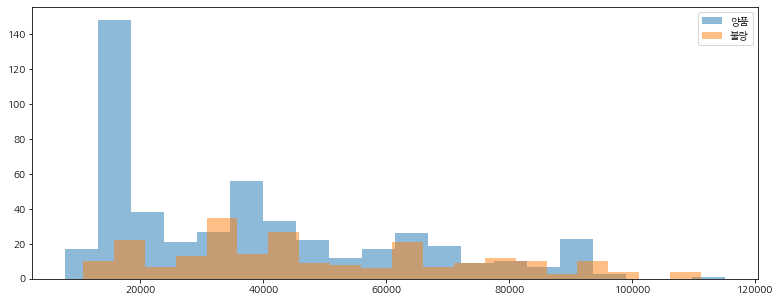

In [ ]:
p_plot_hist(df_raw, 'PT_WEIGHT')
#Plate중량

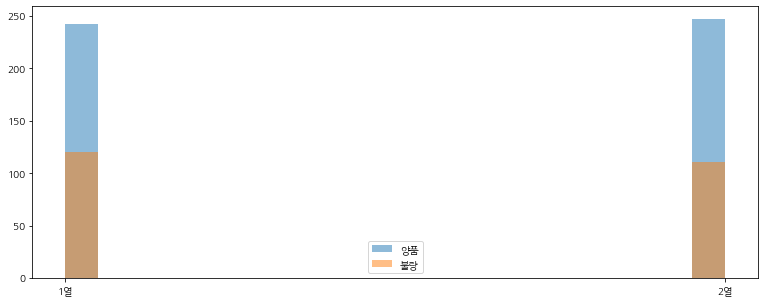

In [ ]:
p_plot_hist(df_raw, 'FUR_NO_ROW')
#가열로 장입열

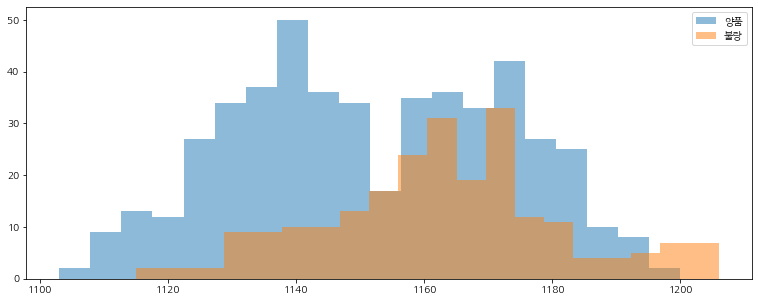

In [ ]:
p_plot_hist(df_raw, 'FUR_HZ_TEMP')
#가열로 가열대 온도 이건 이상치가 아님

1200 이상부터 불량품이 많음 
Step3 에서 고려해야할 사항인거지  
이건 가열로 가열대 온도가 1200 이상이면 안됨 -> Vital few일 가능성이 크다 (예측가능)

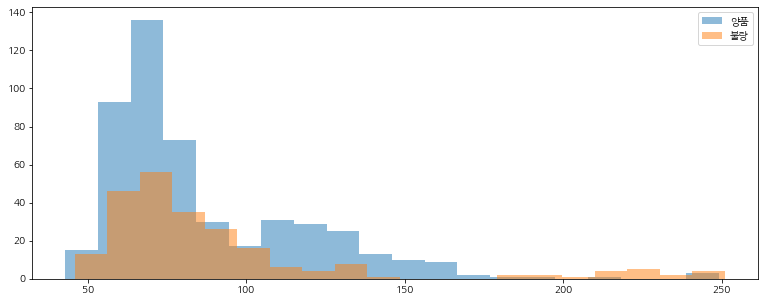

In [ ]:
p_plot_hist(df_raw, 'FUR_HZ_TIME')
#가열로 가열대 시간 
# 처리해야할 이상치 아닌거 같음

이건 이상치여도 이상치 일때 양품이 있기 때문에 유의미한 이상치 인거 같아서   
처리해야할 이상치가 아니 => 양품과 불량품 비율이 비슷하거나 더 높은 부분이 있다 =>Vital few이다

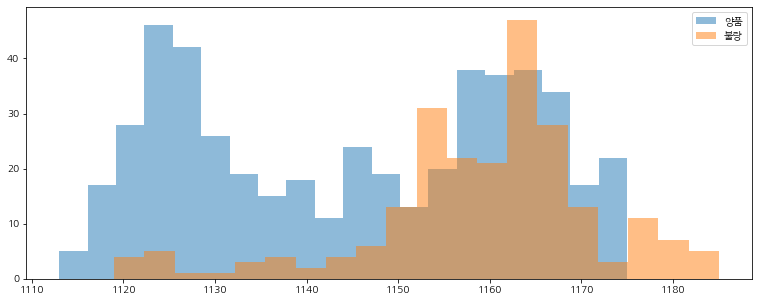

In [ ]:
p_plot_hist(df_raw, 'FUR_SZ_TEMP')
#가열로 균열대 온도

1175 이상부터 불량품이 많음 
Step3 에서 고려해야할 사항인거지  
이건 가열로 가열대 온도가 1175 이상이면 안됨 =>양품과 불량품 비율이 비슷하거나 더 높은 부분이 있다 =>Vital few이다


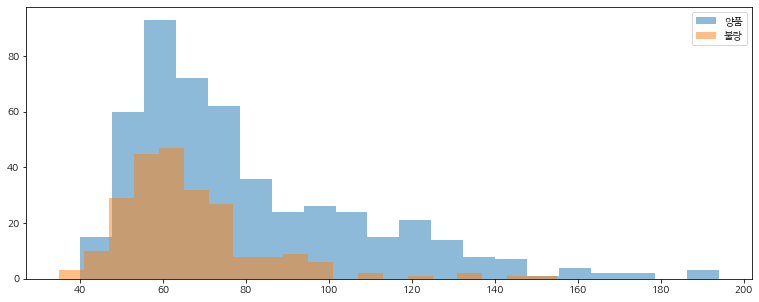

In [ ]:
p_plot_hist(df_raw, 'FUR_SZ_TIME')
#가열로 균열대 시간

이건 이상치일때 양품이 많아서 처리해야할 이상치가 아니다.  
균열 시간이 40 이하일때 전부 불량이기 때문에 
Step3에서 개선 해야할 사항 인 것 같다(기술적인 처리)? 잘모르겠고  
 양품과 불량품 비율이 비슷하거나 더 높은 부분이Vital few인거 같다.

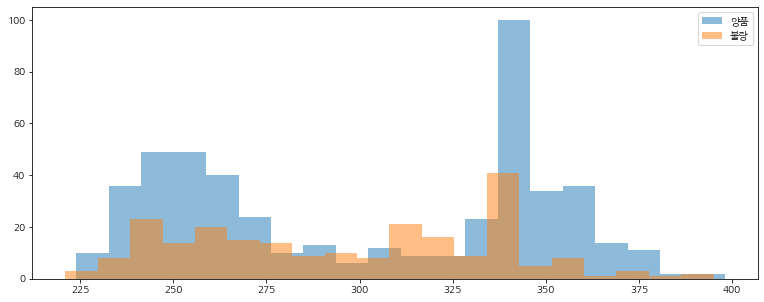

In [ ]:
p_plot_hist(df_raw, 'FUR_TIME')
#가열로 재로시간

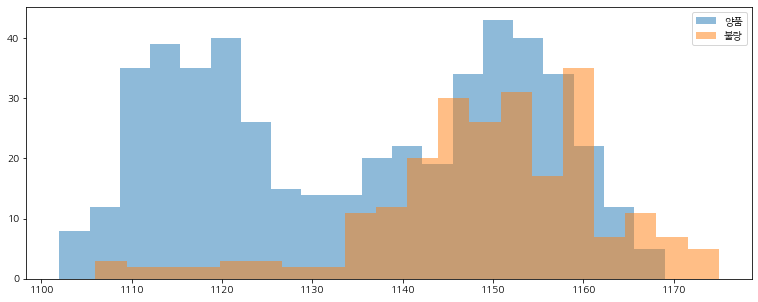

In [ ]:
p_plot_hist(df_raw, 'FUR_EXTEMP')
#가열로 추출온도

1168 이상부터 불량품이 많음 
Step3 에서 고려해야할 사항인거지  
이건 가열로 가열대 온도가 1168 이상이면 안됨 + 양품과 불량품 비율이 비슷하거나 더 높은 부분이
=> Vital few 일 가능성이 크다

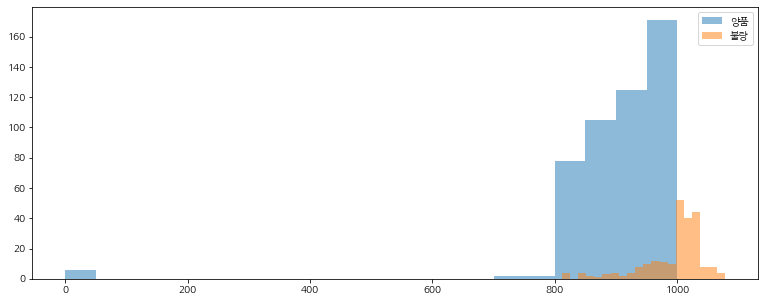

In [ ]:
p_plot_hist(df_raw, 'ROLLING_TEMP_T5')
#가열로 압연온도

양품인데 온도가 0도 주변이라서 의미 없는 데이터 인것 같다. 이상치 처리를 해야 할 것같다.
또한 1000 이상인 부분은 이상치가 아니고
양품과 불량품 비율이 비슷하거나 더 높은 부분이 있다 => Vital few인거 같다.

### **Crosstab을 통한 설명변수에 따른 불량률 확인**

In [ ]:
def p_print_crosstab(data, column_name):
    print(pd.crosstab(index = data['SCALE'], columns = data[column_name]))
    print()
    print(pd.crosstab(index = data['SCALE'], columns = data[column_name], normalize = 'columns').round(3))

In [ ]:
p_print_crosstab(df_raw, 'FUR_NO') 
#뇌피셜:가열로 호기에 따른 불량률 확인 > 유의미한 차이 없음
#통계학적 검정이 필요함 (p-value를 봐야하지 않나)

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      167  167  155

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.304  0.295  0.362
양품      0.696  0.705  0.638


In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency

df_c = pd.DataFrame ({'1호기':[73,167],'2호기':[70,167],'3호기':[88,155]})

chi,pval,dof,expected = stats.chi2_contingency(df_c)
print('chi-square test')
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree pf freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))
#H0: 호기별 불량률에 차이가 없다
#H1 :호기별 불량률에 차이가 있다
#p-value(0.233)값 > 유의수준 (0.05) 이므로 H0 채택
#결론: 유의수준 5%에서 호기별 불량률에 차이가 없다. 따라서, vital few 후보에서 제외함
#expected value:

chi-square test
chisq: 2.915
p: 0.233
degree pf freedom: 2
expected value: 
[[ 77.     76.038  77.962]
 [163.    160.962 165.038]]


#### 강종에 따른 불량률 확인

In [ ]:
p_print_crosstab(df_raw, 'STEEL_KIND') 
#강종에 따른 불량률 확인 > C0의 경우 생산량이 가장 많음. 불량과 양품의 비율이 비슷하므로 추가 분석이 필요함
# C끼리? T끼리? -> 묶어서 확인해야 할 거 같음 이건 통계 검증 할 필요도 없이 직관 적으로 T에서 불량 비율이 작은 것을 알 수 있다.
# 배경지식: 탄소와 티타늄 녹는점 차이가 있기 때문에 (T:1696) (C:1560) 

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          291   0   6  14  16   2  41  29  90

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053
양품          0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947


In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency

df_gang = pd.DataFrame ({'C':[212,295],'T':[17,188]})

chi,pval,dof,expected = stats.chi2_contingency(df_gang)
print('chi-square test')
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree pf freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 73.654
p: 0.000
degree pf freedom: 1
expected value: 
[[163.066  65.934]
 [343.934 139.066]]


p-value가 0.05보다 작아 강종별 불량률의 차이가 있다

##### HSB 적용/미적용에 따른 불량률 확인 


In [ ]:
p_print_crosstab(df_raw, 'HSB') 
#미적용한 것은 모두 불량으로 기존 확인된 잠재원인과 동일함, 따라서 금번 분석에서는 적용하였으나 불량이 발생한 case를 분석해보고자함
# 미적용은 다 불량이기에 Vital Few로 추정됨

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  489

HSB    미적용     적용
SCALE            
불량     1.0  0.288
양품     0.0  0.712


#### 압연간 Descaling 횟수에 따른 불량률 확인


In [ ]:
p_print_crosstab(df_raw, 'ROLLING_DESCALING')
#기존 확인된 잠재원인에서는 Descaling 횟수가 증가할수록 scale 발생확률이 작을 것이라 예상함
# 표면에 붙어 있는 산화철을 제거 하는 것임 , 고압수로 처리함, 너무 많이 되면 제품의 손상이 생김? 
# 근데 홀수 번째 인 것들은 다 불량임 
# 단면을 세는거지 -> 홀수가 불량 일 수 바께 없는거
# 앞1 뒤2 1세트, 앞3 뒤4 앞5 홀수 하면 뒷면은 안한거라서 불량임 _환,현피셜
# 홀수가 데이터가 작은게 원래 짝수로 이루어져야하는데  _환,현피셜
# Scale불량이 작은데 Oversamplig 한거라서 1 3 4 ->*5 된거일 수 있어 _환,현피설,
#그러나 분석 결과 많은 횟수로 descaling을 진행했음에도 불구하고 불량이 발생함 (7,9)
#횟수 외에 다른 영향이 작용한 것인지 추가 분석이 필요함 

ROLLING_DESCALING  5    6   7    8   9    10
SCALE                                       
불량                  5   26  15   99  20   66
양품                  0  150   0  109   0  230

ROLLING_DESCALING   5      6    7      8    9      10
SCALE                                                
불량                 1.0  0.148  1.0  0.476  1.0  0.223
양품                 0.0  0.852  0.0  0.524  0.0  0.777


In [ ]:
df_dscale = pd.DataFrame ({'6':[24,146],'8':[99,109],'10':[66,228]})

chi,pval,dof,expected = stats.chi2_contingency(df_dscale)
print('chi-square test')
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree pf freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 60.196
p: 0.000
degree pf freedom: 2
expected value: 
[[ 47.812  58.5    82.688]
 [122.188 149.5   211.312]]


디스케일에 따라 불량률 차이가 있다

#### 작업자에 따른 불량률 확인


In [ ]:
p_print_crosstab(df_raw, 'WORK_GR')
#1조~4조 평균생산량: %%, 비슷.. 의미없을듯
# 작업조 => 사람이 하는거 새벽에 하면 피곤함(수율이 안나올 가능성 많음)
# 작업조 시간대에 파악 00시부터 06시까지 (야간타임)

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       122  120  118  129

WORK_GR     1조     2조     3조     4조
SCALE                              
불량       0.354  0.273  0.314  0.335
양품       0.646  0.727  0.686  0.665


In [ ]:
df_dscale = pd.DataFrame ({'1조':[67,121],'2조':[45,119],'3조':[53,115],'4조':[64,128]})

chi,pval,dof,expected = stats.chi2_contingency(df_dscale)
print('chi-square test')
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree pf freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 2.868
p: 0.412
degree pf freedom: 3
expected value: 
[[ 60.466  52.747  54.034  61.753]
 [127.534 111.253 113.966 130.247]]


p-value가 0.05보다 크기 때문에 작업조는 스케일 불량률에 유의할만한 변수가 아니다.

In [ ]:
df_raw.shape #이상치 제거완료

(720, 21)

### 이상치 제거
    여기서 무의마한 이상치는 Rolling_temp_t5에서 0-40부분, Plate 두께에서 95 이상인 부분인거 같다. 
    나머지 이상치는 유의미한 이상치라서 제거 하면 안될 것이라고 판단됨

In [ ]:
df_raw.shape

(720, 21)

In [ ]:
df_raw = df_raw[(df_raw['ROLLING_TEMP_T5'] > 100)& (df_raw['PT_THICK'] <95)]

###  필요 없는 columns 제거

In [ ]:
df_raw.drop(['PLATE_NO','ROLLING_DATE','FUR_NO','FUR_NO_ROW','WORK_GR'], axis=1,inplace= True)
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,불량,NK-KA,C0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,적용,8
716,양품,NV-A32,C0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,적용,10
717,양품,NV-A32,C0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,적용,10
718,양품,LR-A,C0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,적용,10


### 다중공선성 확인

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [ ]:
df_const = sm.add_constant(df_raw).drop(['SCALE','SPEC',"STEEL_KIND",'HSB'],axis =1)
# 데이터 테이블 생성 값 입력
df_vif = pd.DataFrame()
# 변수 명 입력
df_vif['variable'] = df_const.columns
# variance_inflation_factor 다중공선성 함수, exog: 설명변수 데이터 
df_vif['VIF'] = [variance_inflation_factor(df_const.values,i) for i in range(df_const.shape[1])]
df_vif.sort_values('VIF', inplace =True)
df_vif


,variable,VIF
6,FUR_HZ_TIME,1.526594
4,PT_WEIGHT,1.555399
2,PT_WIDTH,1.834562
8,FUR_SZ_TIME,2.165624
9,FUR_TIME,2.432080
11,ROLLING_TEMP_T5,3.097356
5,FUR_HZ_TEMP,3.150665
12,ROLLING_DESCALING,4.634293
3,PT_LENGTH,6.352983
1,PT_THICK,7.810367


다중... 공산성이 큰 게 있음 

### 다중공산성 처리 질문

사실 로지스틱 회귀분석은 목표변수가 범주형이라서 할 필요가 없긴하다 
로짓 함수를 선형화로 변형화 시키는 거여서
그 과정에서 설명변수간에 공선성 관계가 조금 흐트러진다? 이런느낌인데  
결론은 굳이 범주형(로지스틱회귀모델)에서 할 필요가 없다

목표변수(1,0)범주형은 진짜 공산성 코이피션트 구할 필요 없음 

In [ ]:
df_raw.dtypes

SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THICK             float64
PT_WIDTH               int64
PT_LENGTH              int64
PT_WEIGHT              int64
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
dtype: object

### RF 로 중요 설명변수 찾기

In [ ]:
# 이미 이상치 제거랑 필요없는 columns는 제거했다.
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

df_raw_x = df_raw_dummy.drop (['SCALE_양품','SCALE_불량','HSB_미적용'], axis =1, inplace = False)
df_raw_y = df_raw_dummy['SCALE_불량']

In [ ]:
df_raw_x

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,HSB_적용
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,...,0,0,0,0,1,0,0,0,0,1
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,...,0,0,0,0,1,0,0,0,0,1
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,...,0,0,0,0,0,0,0,0,1,1
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,...,0,0,0,0,0,0,0,0,1,1
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1172,72,1164,62,245,1155,...,1,0,0,0,0,0,0,0,0,1
716,15.08,3212,48233,18340,1150,61,1169,61,238,1160,...,1,0,0,0,0,0,0,0,0,1
717,16.60,3441,43688,19590,1169,65,1163,77,247,1152,...,1,0,0,0,0,0,0,0,0,1
718,15.59,3363,48740,80240,1179,86,1163,45,243,1154,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
rf_final = RandomForestRegressor(random_state=1234)
rf_final.fit(df_raw_x, df_raw_y)
# print("Score on training set %.3f"%rf_final.score(df_raw_x,df_raw_y))


RandomForestRegressor(random_state=1234)

In [ ]:
v_feature_name = df_raw_x.columns # 변수 명 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance=df_importance[(df_importance['Importance']>=0.001)]
df_importance.round(3)

,Feature,Importance
43,SPEC_JS-SS400,0.001
16,SPEC_AB/A,0.002
44,SPEC_KR-A,0.002
17,SPEC_AB/AH32,0.002
34,SPEC_GL-A32-TM,0.002
42,SPEC_JS-SM490YB,0.002
2,PT_LENGTH,0.004
9,FUR_EXTEMP,0.004
13,SPEC_A283-C,0.005
4,FUR_HZ_TEMP,0.006


Text(0, 0.5, '변수')

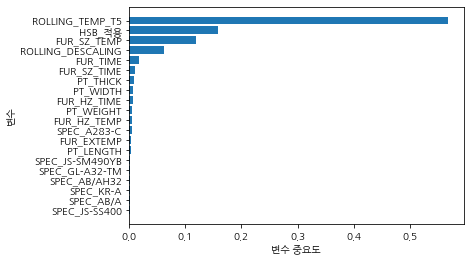

In [ ]:
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### DT 로 중요 설명변수 찾기
앞연 온도 빼고 다시 돌려보기

In [ ]:
tree_final = DecisionTreeRegressor(random_state=1234,)
tree_final.fit(df_raw_x, df_raw_y)

DecisionTreeRegressor(random_state=1234)

In [ ]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance=df_importance[(df_importance['Importance']>=0.001)]
df_importance.round(3)

,Feature,Importance
23,SPEC_BV-AH32,0.001
34,SPEC_GL-A32-TM,0.001
17,SPEC_AB/AH32,0.002
13,SPEC_A283-C,0.003
42,SPEC_JS-SM490YB,0.003
1,PT_WIDTH,0.004
49,SPEC_KS-SM400A,0.006
7,FUR_SZ_TIME,0.006
5,FUR_HZ_TIME,0.011
3,PT_WEIGHT,0.012


Text(0, 0.5, '변수')

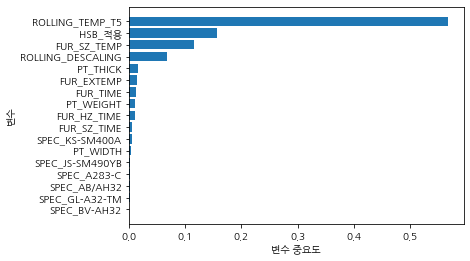

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

###  GB 로 중요 설명변수 찾기


In [ ]:
gb_final = GradientBoostingRegressor(random_state = 1234)
gb_final.fit(df_raw_x, df_raw_y)

#설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_raw_x, df_raw_y)))

Score on training set: 0.991


In [ ]:
v_feature_name = df_raw_x.columns

#feature_importances_:설명변수의 중요도
df_importance=pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance=df_importance[(df_importance['Importance']>=0.001)]
df_importance.round(3)

,Feature,Importance
5,FUR_HZ_TIME,0.001
3,PT_WEIGHT,0.001
4,FUR_HZ_TEMP,0.002
1,PT_WIDTH,0.002
9,FUR_EXTEMP,0.002
2,PT_LENGTH,0.002
7,FUR_SZ_TIME,0.004
8,FUR_TIME,0.008
0,PT_THICK,0.031
11,ROLLING_DESCALING,0.069


Text(0, 0.5, '변수')

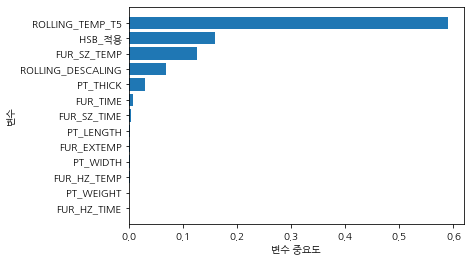

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### 로지스틱 회귀분석

In [ ]:
df_raw['SCALE'][df_raw['SCALE']=='양품']=1

df_raw['SCALE'][df_raw['SCALE']=='불량']=0

In [ ]:
df_raw['STEEL_KIND'][df_raw['STEEL_KIND'].str.contains('T')]=1
df_raw['STEEL_KIND'][df_raw['STEEL_KIND'] != 1] =0 

In [ ]:
df_raw=df_raw.drop('SPEC',axis=1)
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1,1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,1,1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,1,1,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,1,1,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,1,1,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,적용,8
716,1,0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,적용,10
717,1,0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,적용,10
718,1,0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,적용,10


In [ ]:
df_raw = df_raw.astype({'SCALE':'int'})
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1,1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,1,1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,1,1,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,1,1,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,1,1,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,적용,8
716,1,0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,적용,10
717,1,0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,적용,10
718,1,0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,적용,10


In [ ]:
df_raw.shape

(712, 15)

In [ ]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state =1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))


train data size:(498, 15)
test data size:(214, 15)


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 719
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              712 non-null    int64  
 1   STEEL_KIND         712 non-null    object 
 2   PT_THICK           712 non-null    float64
 3   PT_WIDTH           712 non-null    int64  
 4   PT_LENGTH          712 non-null    int64  
 5   PT_WEIGHT          712 non-null    int64  
 6   FUR_HZ_TEMP        712 non-null    int64  
 7   FUR_HZ_TIME        712 non-null    int64  
 8   FUR_SZ_TEMP        712 non-null    int64  
 9   FUR_SZ_TIME        712 non-null    int64  
 10  FUR_TIME           712 non-null    int64  
 11  FUR_EXTEMP         712 non-null    int64  
 12  ROLLING_TEMP_T5    712 non-null    int64  
 13  HSB                712 non-null    object 
 14  ROLLING_DESCALING  712 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 89.0+ KB


In [ ]:
log_model = Logit.from_formula("""SCALE ~  STEEL_KIND + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING""", df_train)


SCALE~ C(STEEL_KIND)+PT_THICK+PT_WIDTH+PT_LENGTH+PT_WEIGHT+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING

In [ ]:
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.274600
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  498
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                           14
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.5626
Time:                        09:13:36   Log-Likelihood:                -136.75
converged:                      False   LL-Null:                       -312.66
Covariance Type:            nonrobust   LLR p-value:                 1.707e-66
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            95.7287   1.31e+13    7.3e-12      1.000   -2.57e+13    2.57e+13
STEEL_KIND[T.1]      -1.1419      0.513     

In [ ]:
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)

In [ ]:
print('Train 예측 결과\n', y_pred_train_class.head(), '\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)), '\n')


Train 예측 결과
 424    1
209    0
60     1
13     1
152    0
dtype: int64 

Confusion Matrix:
[[126  34]
 [ 21 317]] 



In [ ]:
y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)

In [ ]:
print('Test 예측 결과\n', y_pred_test_class.head(), '\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')

Test 예측 결과
 433    1
661    0
651    1
270    1
542    1
dtype: int64 

Confusion Matrix:
[[ 55  14]
 [ 15 130]] 



In [ ]:
print('Train 예측/분류 결과')
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_train['SCALE'],y_pred_train_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)), '\n')
print(classification_report(df_train['SCALE'], y_pred_train_class, digits = 3))


Train 예측/분류 결과
Accuracy:0.890

Confusion Matrix:
[[126  34]
 [ 21 317]] 

              precision    recall  f1-score   support

           0      0.857     0.787     0.821       160
           1      0.903     0.938     0.920       338

    accuracy                          0.890       498
   macro avg      0.880     0.863     0.871       498
weighted avg      0.888     0.890     0.888       498



In [ ]:
print('Test 예측/분류 결과')
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test['SCALE'],y_pred_test_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')
print(classification_report(df_test['SCALE'], y_pred_test_class, digits = 3))

Test 예측/분류 결과
Accuracy:0.864

Confusion Matrix:
[[ 55  14]
 [ 15 130]] 

              precision    recall  f1-score   support

           0      0.786     0.797     0.791        69
           1      0.903     0.897     0.900       145

    accuracy                          0.864       214
   macro avg      0.844     0.847     0.846       214
weighted avg      0.865     0.864     0.865       214



모델의 Test 데이터 정 분류율: 86.4%
우리가 중요하게 여겨야 할 것은
불량(0)을 양품(1)으로 분류한 것이 가장 기업 이미지에 타격이 간다
양품과 불량의 비율이 32%정도여서 불균형 자료가 아니라 f1 socre가 엄청 중요하진 않지만 
높으면 좋다

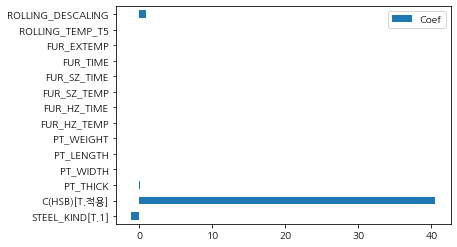

In [ ]:
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef')

정규화 시키지 않았을 경우에 HSB적용 미적용이 가장 높은 결정요인으로 나타난다.

In [ ]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes (exclude = 'object')

In [ ]:
scaler=StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

In [ ]:
df_scaled= pd.concat([df_numeric_scaled, df_char], axis =1)
df_scaled.head(30)


,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,STEEL_KIND,HSB
0,0.688564,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.762531,-0.958783,-0.628535,-0.403383,-0.824262,-0.114012,-0.207012,1,적용
1,0.688564,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.927436,-0.844589,-0.857776,-0.381307,-1.104983,-0.068305,-0.207012,1,적용
2,0.688564,0.234158,1.565395,-1.112551,-0.945934,-1.272568,0.762531,-1.643949,-0.781362,-0.403383,-1.891001,-0.799626,-0.207012,1,적용
3,0.688564,0.234158,1.565395,-1.112551,-0.945934,-0.168543,1.009888,-1.301366,-0.284673,0.347201,-1.497992,-0.860570,-0.207012,1,적용
4,0.688564,0.505785,0.555681,-1.537919,-1.175924,-0.744556,1.257246,-1.244269,-1.048810,0.303049,-1.217271,-1.043400,-0.207012,1,적용
5,0.688564,0.505785,0.555681,-1.537919,-1.175924,-0.600553,1.064857,-1.244269,-0.704949,0.303049,-1.104983,-1.028164,-0.207012,1,적용
6,0.688564,0.505785,0.557619,-1.291661,-1.048421,-0.840558,1.037372,-1.130075,-0.972397,-0.248851,-1.217271,-0.967221,-0.207012,1,적용
7,0.688564,0.505785,0.557619,-1.291661,-1.048421,-0.792557,1.037372,-1.072977,-0.895983,-0.138471,-1.161127,-1.089108,-0.207012,1,적용
8,0.688564,0.505785,0.557619,-1.291661,-1.048421,-1.368570,1.037372,-1.586852,-0.895983,-0.160547,-1.554136,-1.043400,-0.207012,1,적용
9,0.688564,0.511153,0.615760,-1.330364,-1.060929,-0.984561,0.844983,-1.472657,-0.093639,-0.050167,-1.666424,-0.921513,-0.207012,1,적용


In [ ]:
df_scaled['SCALE'] = np.where(df_scaled['SCALE']>0, 1, 0)
df_scaled.head()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,STEEL_KIND,HSB
0,1,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.762531,-0.958783,-0.628535,-0.403383,-0.824262,-0.114012,-0.207012,1,적용
1,1,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.927436,-0.844589,-0.857776,-0.381307,-1.104983,-0.068305,-0.207012,1,적용
2,1,0.234158,1.565395,-1.112551,-0.945934,-1.272568,0.762531,-1.643949,-0.781362,-0.403383,-1.891001,-0.799626,-0.207012,1,적용
3,1,0.234158,1.565395,-1.112551,-0.945934,-0.168543,1.009888,-1.301366,-0.284673,0.347201,-1.497992,-0.860570,-0.207012,1,적용
4,1,0.505785,0.555681,-1.537919,-1.175924,-0.744556,1.257246,-1.244269,-1.048810,0.303049,-1.217271,-1.043400,-0.207012,1,적용


In [ ]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state =1234)

scaled_log_model = Logit.from_formula("""SCALE ~  STEEL_KIND + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.366409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  490
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                           14
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.4083
Time:                        09:13:37   Log-Likelihood:                -179.54
converged:                       True   LL-Null:                       -303.44
Covariance Type:            nonrobust   LLR p-value:                 8.202e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8981      0.687      1.308      0.191      -0.448       2.244
STEEL_KI

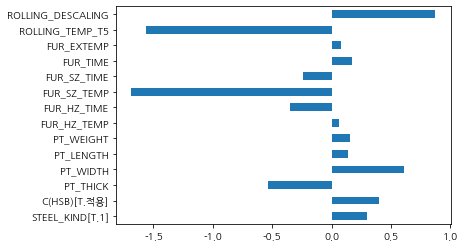

In [ ]:
df_log_scaled_coef = pd.DataFrame({'Coef':scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef', legend = False)

SCALING된 계수를 보면 
결정적인 요인은 ROLLING_DESALING, ROLLING_TEMP_T5, FUR_SZ_TEMP,PT_WIDTH, HSB적용 요인등이 있다.

### 의사결정나무 분류모델

In [ ]:
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1,1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,1,1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,1,1,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,1,1,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,1,1,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,적용,8
716,1,0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,적용,10
717,1,0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,적용,10
718,1,0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,적용,10


In [ ]:
df_raw['HSB'][df_raw['HSB']=='적용']=1
df_raw['HSB'][df_raw['HSB']=='미적용']=0

df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1,1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,1,8
1,1,1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,1,8
2,1,1,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,1,8
3,1,1,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,1,8
4,1,1,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,1,8
716,1,0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,1,10
717,1,0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,1,10
718,1,0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,1,10


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 719
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              712 non-null    int64  
 1   STEEL_KIND         712 non-null    object 
 2   PT_THICK           712 non-null    float64
 3   PT_WIDTH           712 non-null    int64  
 4   PT_LENGTH          712 non-null    int64  
 5   PT_WEIGHT          712 non-null    int64  
 6   FUR_HZ_TEMP        712 non-null    int64  
 7   FUR_HZ_TIME        712 non-null    int64  
 8   FUR_SZ_TEMP        712 non-null    int64  
 9   FUR_SZ_TIME        712 non-null    int64  
 10  FUR_TIME           712 non-null    int64  
 11  FUR_EXTEMP         712 non-null    int64  
 12  ROLLING_TEMP_T5    712 non-null    int64  
 13  HSB                712 non-null    object 
 14  ROLLING_DESCALING  712 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 105.2+ KB


In [ ]:
df_raw = df_raw.astype({'SCALE':'int', 'STEEL_KIND':'int','HSB':'int'})
# STEEL_KIND: 탄소가 1 , 티타늄이 0

In [ ]:

df_raw_x = df_raw.drop (['SCALE'], axis =1, inplace = False)
df_raw_y = df_raw['SCALE']


In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, " Test",df_test_x.shape)

분할 전 설명변수 데이터: (712, 14)
분할 후 설명변수 데이터:Train (498, 14)  Test (214, 14)


In [ ]:
df_raw_x

,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,1,8
1,1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,1,8
2,1,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,1,8
3,1,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,1,8
4,1,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,1,8
716,0,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,1,10
717,0,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,1,10
718,0,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,1,10


In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y))) #train data 설명력
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y))) #test data 설명력 

Score on training set: 1.000
Score on test set: 0.958


In [ ]:
df_train_x

,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
424,1,38.33,3099,16740,15610,1126,73,1118,89,270,1110,868,1,8
209,0,30.13,2288,30730,33260,1165,79,1158,85,291,1146,1032,1,8
60,1,65.69,2498,11978,15430,1142,110,1134,73,343,1123,851,1,5
13,1,30.23,1940,34797,16020,1119,130,1120,65,324,1112,926,1,8
152,0,35.15,2466,31229,106250,1159,61,1162,72,303,1149,1030,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0,20.43,2999,34888,50340,1146,54,1151,66,248,1140,993,1,8
375,0,20.14,3278,30873,32000,1191,62,1174,58,243,1159,982,1,8
207,0,30.13,2288,30730,33260,1160,71,1157,97,294,1148,1012,1,8
54,1,60.57,2085,16583,32880,1141,113,1133,73,332,1119,852,1,6


In [ ]:

tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y))) #train data 설명력
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y))) #test data 설명력 


Score on training set: 1.000
Score on test set: 0.958


In [ ]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

In [ ]:

train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

In [ ]:
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth.round(3)


,Depth,TrainAccuracy,TestAccuracy
0,1,0.884,0.893
1,2,0.932,0.925
2,3,0.964,0.949
3,4,0.974,0.949
4,5,0.976,0.949
5,6,0.976,0.939
6,7,0.980,0.953
7,8,0.982,0.953
8,9,0.984,0.963
9,10,0.986,0.944


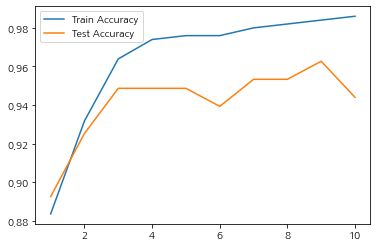

In [ ]:
plt.plot(para_depth,train_accuracy,linestyle='-',label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='-',label = "Test Accuracy")
plt.legend()


In [ ]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x,df_train_y)


DecisionTreeClassifier(max_depth=4, random_state=1234)

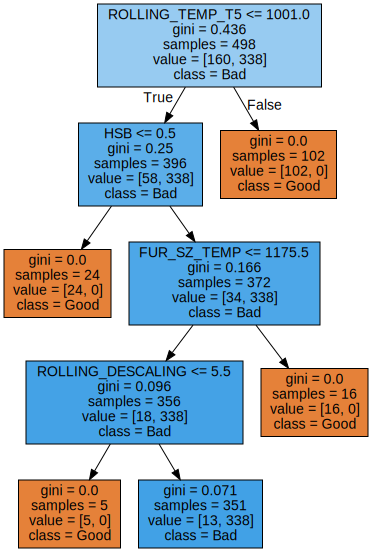

In [ ]:
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good","Bad"],
feature_names = v_feature_name, impurity = True, filled = True)
# graphvz
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
tree_high = DecisionTreeClassifier(max_depth = 9, random_state=1234)
tree_high.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=9, random_state=1234)

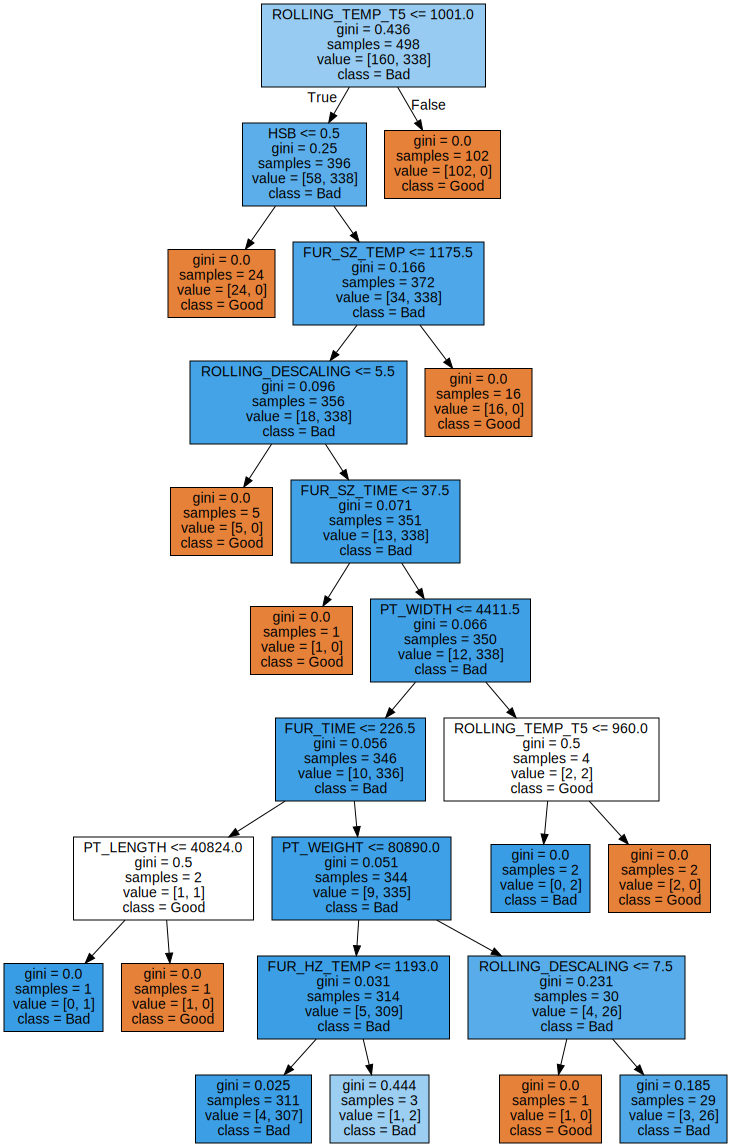

In [ ]:
export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good","Bad"],
feature_names = v_feature_name, impurity = True, filled = True)
# graphvz
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [ ]:
train_accuracy = []; test_accuracy = [] 
#train 및 test 설명력 결과 저장 
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_split = v_min_samples_split,max_depth=4)

    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainScore'] = train_accuracy
df_accuracy_split['TestScore'] = test_accuracy
#결과저장 

df_accuracy_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.974,0.949
1,20,0.974,0.949
2,30,0.974,0.949
3,40,0.974,0.949
4,50,0.974,0.949
5,60,0.974,0.949
6,70,0.974,0.949
7,80,0.974,0.949
8,90,0.974,0.949
9,100,0.974,0.949


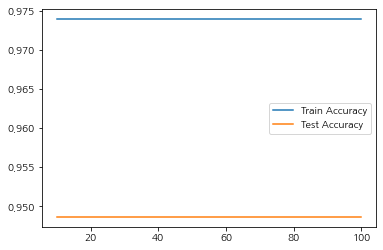

In [ ]:
plt.plot(para_split,train_accuracy,linestyle='-',label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='-',label = "Test Accuracy")
plt.legend()

In [ ]:
tree_low = DecisionTreeClassifier(max_depth = 9, min_samples_split=30, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=9, min_samples_split=30, random_state=1234)

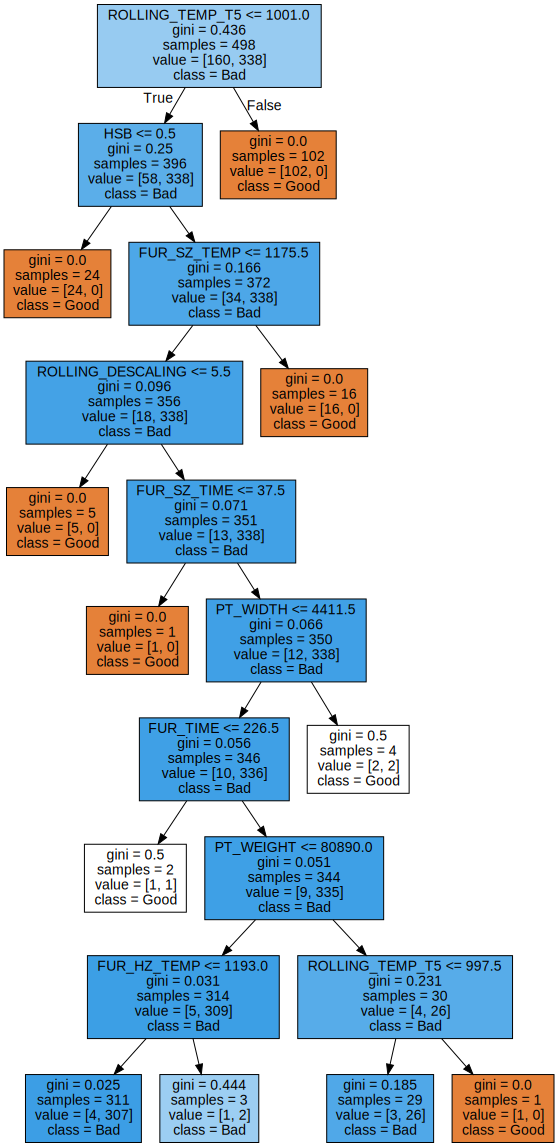

In [ ]:
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good","Bad"],
feature_names = v_feature_name, impurity = True, filled = True)
# graphvz
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [ ]:
tree_high = DecisionTreeClassifier(max_depth = 9,min_samples_split=60, random_state=1234)
tree_high.fit(df_train_x,df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good","Bad"],
feature_names = v_feature_name, impurity = True, filled = True)

In [ ]:
train_accuracy = []; test_accuracy = [] 
#train 및 test 설명력 결과 저장 
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = v_min_samples_leaf,min_samples_split=30,max_depth=9)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainScore'] = train_accuracy
df_accuracy_leaf['TestScore'] = test_accuracy
#결과저장 

df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainScore,TestScore
0,2,0.990,0.953
1,4,0.986,0.944
2,6,0.982,0.977
3,8,0.982,0.977
4,10,0.980,0.977
5,12,0.964,0.972
6,14,0.964,0.972
7,16,0.964,0.972
8,18,0.958,0.972
9,20,0.952,0.958


DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=30,
                       random_state=1234)

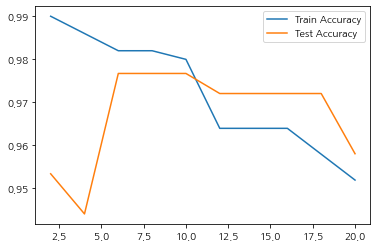

In [ ]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='-',label = "Test Accuracy")
plt.legend()

tree_low = DecisionTreeClassifier(max_depth=9, min_samples_split=30,min_samples_leaf=6, random_state=1234)
tree_low.fit(df_train_x,df_train_y)


In [ ]:

# 잎사귀의 최소 자료수가 10인모델
tree_high = DecisionTreeClassifier(max_depth=9, min_samples_split=30,min_samples_leaf=10, random_state=1234)
tree_high.fit(df_train_x,df_train_y)

export_graphviz(tree_high, out_file = 'tree_low.dot', class_names =['Good','Bad'],feature_names= v_feature_name,
                impurity = True, filled = True)


In [ ]:
# 최종모델 
tree_final = DecisionTreeClassifier(max_depth=9, min_samples_split=30,min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names =['Good','Bad'],feature_names= v_feature_name,
                impurity = True, filled = True)


In [ ]:
#최종모델 평가
y_pred = tree_final.predict(df_test_x)
print('Accuracy:{0:3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy:0.976636

Confusion matrix:
[[ 64   5]
 [  0 145]]


In [ ]:
# 목표변수의 빈도 불균형: f1 Score모델 평가
print(classification_report(df_test_y,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.928     0.962        69
           1      0.967     1.000     0.983       145

    accuracy                          0.977       214
   macro avg      0.983     0.964     0.973       214
weighted avg      0.977     0.977     0.976       214



In [ ]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
11,ROLLING_TEMP_T5,0.583
12,HSB,0.183
7,FUR_SZ_TEMP,0.155
1,PT_THICK,0.067
13,ROLLING_DESCALING,0.010
3,PT_LENGTH,0.001
0,STEEL_KIND,0.000
2,PT_WIDTH,0.000
4,PT_WEIGHT,0.000
5,FUR_HZ_TEMP,0.000


Text(0, 0.5, '설명변수')

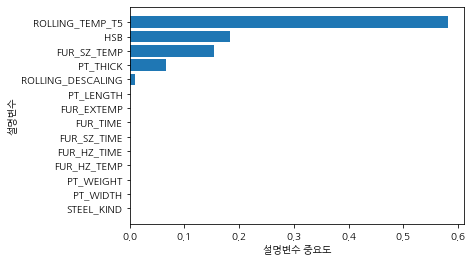

In [ ]:

df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### 렌덤포레스트 분류모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set:0.953


In [ ]:

train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.998,0.958
1,20,1.000,0.967
2,30,1.000,0.963
3,40,1.000,0.958
4,50,1.000,0.958
5,60,1.000,0.958
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.967
9,100,1.000,0.953


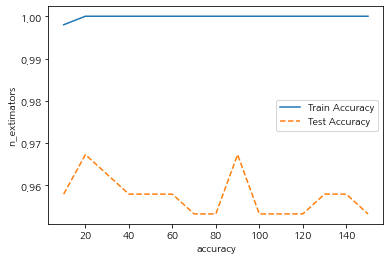

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("n_extimators");plt.xlabel("accuracy")
plt.legend()

In [ ]:
oob_error = []

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 -rf.oob_score_)

Text(0.5, 0, 'n_estimators')

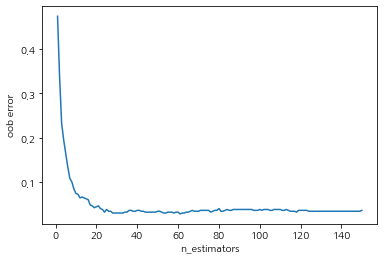

In [ ]:


plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")


In [ ]:

n_estimators = 20

In [ ]:


train_accuracy = []; test_accuracy = []
para_dept = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth , n_estimators = 20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)


,Depth,TrainAccuracy,TestAccuracy
0,1,0.849,0.827
1,2,0.890,0.879
2,3,0.916,0.907
3,4,0.940,0.925
4,5,0.970,0.949
5,6,0.978,0.953
6,7,0.986,0.949
7,8,0.992,0.958
8,9,0.998,0.963
9,10,0.998,0.963


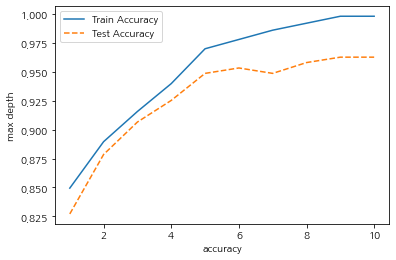

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("max depth");plt.xlabel("accuracy")
plt.legend()


In [ ]:
max_depth = 5

In [ ]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
 
# min_samples_depth: 잎사귀 최소 자료 수
para_split = [n_split *10 for n_split in range(1, 11)]            # 참조: para_leaf : [1,2,3,…,19]
 
for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,n_estimators=20,
                                 min_samples_split=v_min_samples_split
                                 , max_depth= 2)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
#결과저장    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSampliesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_split.round(3)

,MinSampliesSplit,TrainAccuracy,TestAccuracy
0,10,0.890,0.879
1,20,0.890,0.879
2,30,0.890,0.879
3,40,0.890,0.879
4,50,0.890,0.879
5,60,0.890,0.879
6,70,0.890,0.879
7,80,0.890,0.879
8,90,0.888,0.879
9,100,0.886,0.879


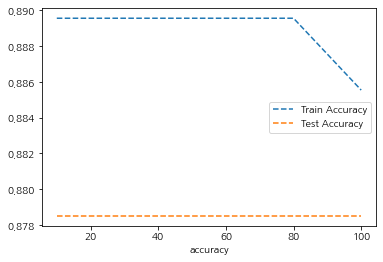

In [ ]:
plt.plot(para_split,train_accuracy,linestyle='--',label = 'Train Accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.xlabel('min samples split');plt.xlabel('accuracy')
plt.legend()

In [ ]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = [ ]
 
# min_samples_depth: 잎사귀 최소 자료 수
para_leaf = [n_leaf *10 for n_leaf in range(1, 11)]            # 참조: para_leaf : [1,2,3,…,19]
 
for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234,n_estimators=20,
                                 min_samples_leaf=v_min_samples_leaf
                                 , max_depth= 2)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
#결과저장    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_accuracy
df_score_leaf["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.990,0.953
1,4,0.986,0.944
2,6,0.982,0.977
3,8,0.982,0.977
4,10,0.980,0.977
5,12,0.964,0.972
6,14,0.964,0.972
7,16,0.964,0.972
8,18,0.958,0.972
9,20,0.952,0.958


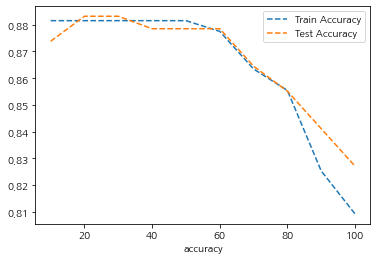

In [ ]:
plt.plot(para_leaf,train_accuracy,linestyle='--',label = 'Train Accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.xlabel('min samples leaf');plt.xlabel('accuracy')
plt.legend()

In [ ]:
rf_final = RandomForestClassifier(random_state=1234,n_estimators=20,min_samples_leaf=8,
                                 max_depth=2)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_test_x)
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x,df_train_y)))

print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred, digits=3))

Accuracy on training set : 0.882
Accuracy on test set : 0.874
Confusion matrix: 
[[ 42  27]
 [  0 145]]
              precision    recall  f1-score   support

           0      1.000     0.609     0.757        69
           1      0.843     1.000     0.915       145

    accuracy                          0.874       214
   macro avg      0.922     0.804     0.836       214
weighted avg      0.894     0.874     0.864       214



In [ ]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance',ascending = False,inplace= True)
df_importance.round(3)


,Feature,Importance
11,ROLLING_TEMP_T5,0.311
7,FUR_SZ_TEMP,0.219
2,PT_WIDTH,0.113
1,PT_THICK,0.096
0,STEEL_KIND,0.062
12,HSB,0.061
10,FUR_EXTEMP,0.046
3,PT_LENGTH,0.044
5,FUR_HZ_TEMP,0.023
13,ROLLING_DESCALING,0.016


Text(0, 0.5, '변수')

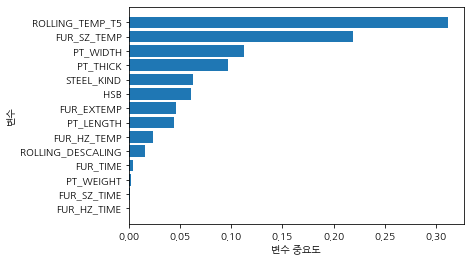

In [ ]:
df_importance.sort_values('Importance',ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [ ]:
estimator = RandomForestClassifier(n_estimators=20 ,random_state =1234)

param_grid = {'max_depth':para_depth,
             'min_samples_leaf':para_leaf}

grid_rf = GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)

print('best estimator model : \n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_rf.best_params_))
print('\nbest score : \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model : 
RandomForestClassifier(max_depth=7, min_samples_leaf=10, n_estimators=20,
                       random_state=1234)

best parameter : 
{'max_depth': 7, 'min_samples_leaf': 10}

best score : 
0.904


In [ ]:
df_train_x

,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
424,1,38.33,3099,16740,15610,1126,73,1118,89,270,1110,868,1,8
209,0,30.13,2288,30730,33260,1165,79,1158,85,291,1146,1032,1,8
60,1,65.69,2498,11978,15430,1142,110,1134,73,343,1123,851,1,5
13,1,30.23,1940,34797,16020,1119,130,1120,65,324,1112,926,1,8
152,0,35.15,2466,31229,106250,1159,61,1162,72,303,1149,1030,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0,20.43,2999,34888,50340,1146,54,1151,66,248,1140,993,1,8
375,0,20.14,3278,30873,32000,1191,62,1174,58,243,1159,982,1,8
207,0,30.13,2288,30730,33260,1160,71,1157,97,294,1148,1012,1,8
54,1,60.57,2085,16583,32880,1141,113,1133,73,332,1119,852,1,6


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

### 그레디언트 부스팅 분류모델

In [ ]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set:1.000
Accuracy on test set:0.977


In [ ]:
gb_uncustomized


GradientBoostingClassifier(random_state=1234)

In [ ]:
train_accuracy = [];test_accuracy = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))


In [ ]:
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy


In [ ]:
df_accuracy_lr.round(3)


,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.977
1,0.2,1.0,0.977
2,0.3,1.0,0.977
3,0.4,1.0,0.977
4,0.5,1.0,0.977
5,0.6,1.0,0.963
6,0.7,1.0,0.981
7,0.8,1.0,0.977
8,0.9,1.0,0.972


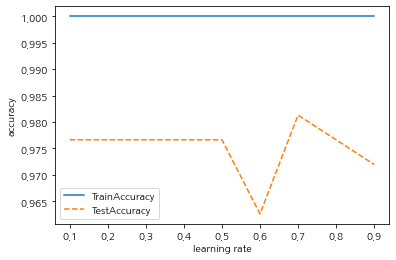

In [ ]:
plt.plot(para_lr, train_accuracy, linestyle="-", label="TrainAccuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label="TestAccuracy")
plt.ylabel("accuracy");plt.xlabel("learning rate")
plt.legend()


In [ ]:
train_accuracy = [];test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimatros in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimatros,learning_rate = 0.7, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))


In [ ]:
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy


In [ ]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.981
1,20,1.0,0.981
2,30,1.0,0.981
3,40,1.0,0.981
4,50,1.0,0.981
5,60,1.0,0.981
6,70,1.0,0.981
7,80,1.0,0.981
8,90,1.0,0.981
9,100,1.0,0.981


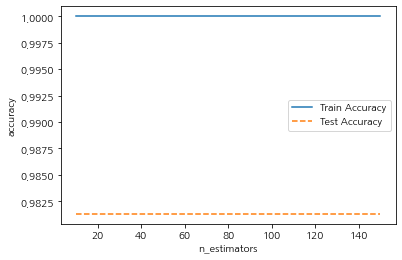

In [ ]:
plt.plot(para_n_tree,train_accuracy,linestyle='-', label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--', label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_estimators")
plt.legend()

In [ ]:
train_accuracy = [];test_accuracy = []
para_depth = [depth for depth in range(1,11)]


In [ ]:
for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,n_estimators = 100,learning_rate = 0.7, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))



In [ ]:
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


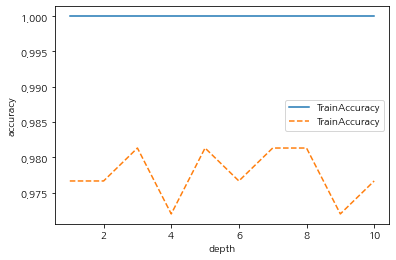

In [ ]:
df_accuracy_depth.round(3)
plt.plot(para_depth, train_accuracy,linestyle="-", label="TrainAccuracy")
plt.plot(para_depth, test_accuracy,linestyle="--", label="TrainAccuracy")
plt.ylabel("accuracy");plt.xlabel("depth")
plt.legend()


In [ ]:
max_depth = 8

In [ ]:
train_accuracy = [];test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,11)]



In [ ]:
for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 8, n_estimators = 100,learning_rate = 0.7, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy


Text(0.5, 0, 'min samples split')

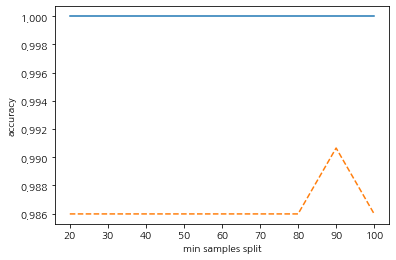

In [ ]:
df_accuracy_split.round(3)
plt.plot(para_split, train_accuracy,linestyle="-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy,linestyle="--", label="TestAccuracy")
plt.ylabel("accuracy");plt.xlabel("min samples split")


In [ ]:
train_accuracy = [];test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 8, n_estimators = 100,learning_rate = 0.7, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


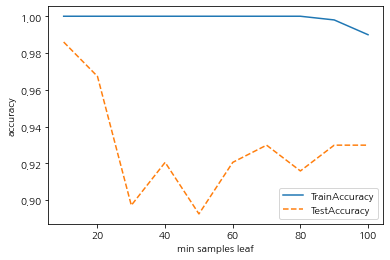

In [ ]:
df_accuracy_leaf.round(3)
plt.plot(para_leaf, train_accuracy,linestyle="-", label="TrainAccuracy")
plt.plot(para_leaf, test_accuracy,linestyle="--", label="TestAccuracy")
plt.ylabel("accuracy");plt.xlabel("min samples leaf")
plt.legend()

In [ ]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth= 8, n_estimators=100, learning_rate=0.7, random_state=1234)


In [ ]:
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)


In [ ]:
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Accuracy on test: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy on training set: 1.000
Accuracy on test: 0.986
Confusion matrix: 
[[ 66   3]
 [  0 145]]


In [ ]:
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.957     0.978        69
           1      0.980     1.000     0.990       145

    accuracy                          0.986       214
   macro avg      0.990     0.978     0.984       214
weighted avg      0.986     0.986     0.986       214



In [ ]:
#변수명
v_feature_name = df_train_x.columns

#feature_importances_:설명변수의 중요도
df_importance=pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace= True)
df_importance.round(3)



,Feature,Importance
11,ROLLING_TEMP_T5,0.566
12,HSB,0.176
7,FUR_SZ_TEMP,0.147
1,PT_THICK,0.067
13,ROLLING_DESCALING,0.018
3,PT_LENGTH,0.005
5,FUR_HZ_TEMP,0.004
9,FUR_TIME,0.003
4,PT_WEIGHT,0.003
2,PT_WIDTH,0.003


Text(0, 0.5, '변수')

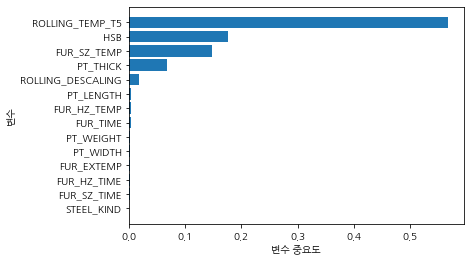

In [ ]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"]) #y축 눈금
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 번외) GridSearchCV를 이용한 최적 parameter 찾기

# estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)
# #구하고자 하는 parameter와 범위
# param_grid = {"learning_rate":para_lr, "max_depth": para_depth, "min_samples_leaf":para_leaf}

# #설명력이 높은 최적 parameter 찾기
# grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
# grid_gb.fit(df_train_x, df_train_y)

 
# print("best estimator model: \n{}".format(grid_gb.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_gb.best_params_))
# print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))


### SVM

In [ ]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x,df_train_y)


print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.679
Accuracy on test set:0.678


In [ ]:
train_accuracy = []; test_accuracy = []

para_c = [0.1 *c for c in range(1,10)]
#C: 규제에 대한 강도 변경 

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
#C가 작을수록 이상치를 많이 허용하고, 클수록 이상치를 적게 허용함
#Cost 값을 변경하여 실행해본 결과 0.5일때 test accuracy 값이 높음
#0.5이후로는 과대적합 된 것으로 보임

# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.679,0.678
1,0.2,0.679,0.678
2,0.3,0.679,0.678
3,0.4,0.679,0.678
4,0.5,0.679,0.678
5,0.6,0.679,0.678
6,0.7,0.679,0.678
7,0.8,0.679,0.678
8,0.9,0.679,0.678


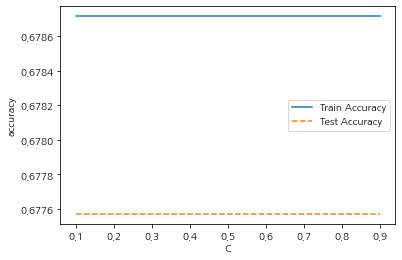

In [ ]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# gamma : 규제(0.01, 0.1, 1, 10)
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma :
    svm = SVC(gamma = v_gamma, C = 0.5, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

# gamma별 정확도 테이블
df_accuracy_gamma.round(4)
#gamma 값은 모델의 복잡도를 결정함. 값이 작을수록 결정 결계가 부드럽고, 클수록 하나의 포인트에 민감함 
#gamma 값 변화시켜본 결과 0.01값일때 train 데이터 정확도가 높음

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.6867,0.6776
1,0.10,0.6787,0.6776
2,1.00,0.6787,0.6776
3,10.00,0.6787,0.6776


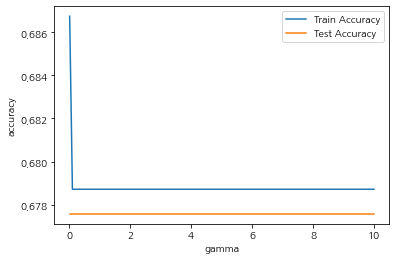

In [ ]:
# 모델의 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

In [ ]:
# scale 변환
v_feature_name=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1.572632,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.762531,-0.958783,-0.628535,-0.403383,-0.824262,-0.114012,0.220456,-0.207012
1,1.572632,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.927436,-0.844589,-0.857776,-0.381307,-1.104983,-0.068305,0.220456,-0.207012
2,1.572632,0.234158,1.565395,-1.112551,-0.945934,-1.272568,0.762531,-1.643949,-0.781362,-0.403383,-1.891001,-0.799626,0.220456,-0.207012
3,1.572632,0.234158,1.565395,-1.112551,-0.945934,-0.168543,1.009888,-1.301366,-0.284673,0.347201,-1.497992,-0.860570,0.220456,-0.207012
4,1.572632,0.505785,0.555681,-1.537919,-1.175924,-0.744556,1.257246,-1.244269,-1.048810,0.303049,-1.217271,-1.043400,0.220456,-0.207012


In [ ]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (498, 14)
test data X size : (214, 14)


In [ ]:
svm_scaled=SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))
#scaling한 데이터로 새로운 모델 생성, scale data로 모델 fit한 결과 train, test data 모두 정확도가 기존 대비 상승

Accuracy on training set: 0.924
Accuracy on test set: 0.907


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# C : 규제 (0.01, 0.1, 1. 10)
para_c = [10 ** c for c in range(-2,2)]


for v_C in para_c :
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
#C가 10일때 train data 정확도는 증가하나 test data 정확도가 하락하는 경향을 보임
#따라서 1.0으로 선정

# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.679,0.678
1,0.10,0.888,0.883
2,1.00,0.924,0.907
3,10.00,0.962,0.907


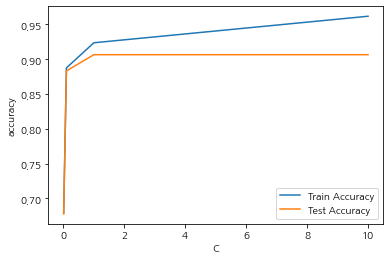

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

In [ ]:
# train 및 test 정확도 결과 정확도
train_accuracy = []; test_accuracy = []
#gamma: 규제(0.01, 0.1.1,10)
para_gamma = [0.1 * gamma for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C=1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["n_estimators"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,0.1,0.932,0.902
1,0.2,0.938,0.902
2,0.3,0.942,0.893
3,0.4,0.946,0.883
4,0.5,0.948,0.879
5,0.6,0.956,0.846
6,0.7,0.966,0.836
7,0.8,0.976,0.827
8,0.9,0.982,0.818


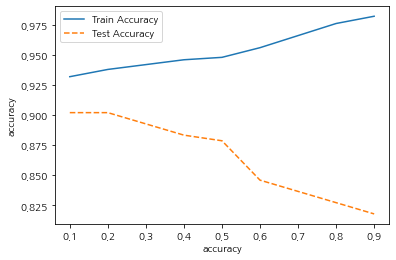

In [ ]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("accuracy")
plt.legend()
#gamma가 0.2 이상이면 train데이터의 모델은 과대 적합됨 , gamma 변화 구간을 변경하여 정확도 확인 가능

In [ ]:
svc_final = SVC(gamma = 0.2, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))

# Test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.679
Accuracy on test set: 0.678


In [ ]:
# confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

#test 데이터 기준 정분류율은 67.8%로 기본옵션으로 생성한 모델 대비(test 데이터 기준: 90.7%) 낮다.
#0기준 f1-score는 83.7, 재현율이 78.3%, 정밀도 90.0%

Confusion matrix: 
[[ 54  15]
 [  6 139]]
              precision    recall  f1-score   support

           0      0.900     0.783     0.837        69
           1      0.903     0.959     0.930       145

    accuracy                          0.902       214
   macro avg      0.901     0.871     0.883       214
weighted avg      0.902     0.902     0.900       214



In [ ]:
# estimator = SVC(random_state = 1234)

# param_grid = {'C':para_c,'gamma': para_gamma}

# grid_rf = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
# grid_rf.fit(df_scaled_train_x, df_train_y)

# print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
# print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
# print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

### KNN 분류모델

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#기본 옵션으로 모델생성

knn_uncustomized = KNeighborsClassifier ()
knn_uncustomized.fit(df_train_x, df_train_y)

# Train data 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

# Test data 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

# 모델 정확도 82.3%, test 72.0%로 과대적합

Accuracy on training set: 0.823
Accuracy on test set: 0.720


In [ ]:
#이웃 수 증가에 따른 정확도 변화

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,16)]


for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.715
1,2,0.839,0.692
2,3,0.839,0.738
3,4,0.807,0.752
4,5,0.823,0.720
5,6,0.801,0.724
6,7,0.791,0.720
7,8,0.797,0.724
8,9,0.799,0.729
9,10,0.783,0.715


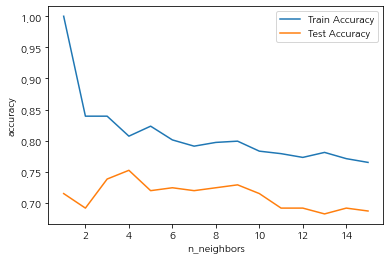

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_neighbors')
plt.legend()
#군집이 1개일 떄 Train 데이터의 정확도는 1임
#이후 train data 정확도는 감소하고 test data 정확도는 올라가는 경향을 보임 
# 4 선택

In [ ]:
#가중치별 이웃 수 증가에 따른 정확도 변화

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] *2
para_weights = (['uniform']) * 10 + (['distance'] *10)

#zip을 사용하면 list1과 list2의 인덱스 별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]

for (v_n_neighbors, v_weights) in zip (para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.715
1,2,uniform,0.839,0.692
2,3,uniform,0.839,0.738
3,4,uniform,0.807,0.752
4,5,uniform,0.823,0.720
5,6,uniform,0.801,0.724
6,7,uniform,0.791,0.720
7,8,uniform,0.797,0.724
8,9,uniform,0.799,0.729
9,10,uniform,0.783,0.715


In [ ]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns ='Weights', values = ['TrainAccuracy','TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.714953  0.714953
2                   1.0  0.839357     0.714953  0.691589
3                   1.0  0.839357     0.775701  0.738318
4                   1.0  0.807229     0.761682  0.752336
5                   1.0  0.823293     0.738318  0.719626
6                   1.0  0.801205     0.733645  0.724299
7                   1.0  0.791165     0.733645  0.719626
8                   1.0  0.797189     0.728972  0.724299
9                   1.0  0.799197     0.728972  0.728972
10                  1.0  0.783133     0.719626  0.714953

In [ ]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 +'_'+level1
df_accuracy_weights_pivot.head() 
#pivot의 경우 columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.714953,0.714953
2,1.0,0.839357,0.714953,0.691589
3,1.0,0.839357,0.775701,0.738318
4,1.0,0.807229,0.761682,0.752336
5,1.0,0.823293,0.738318,0.719626


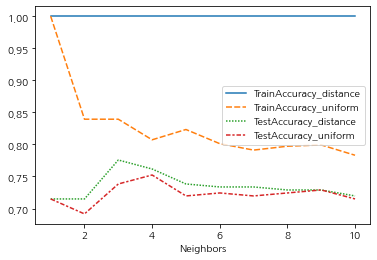

In [ ]:
sns.lineplot(data = df_accuracy_weights_pivot)
weights = 'uniform'
#가중치가 distance일 때 train 데이터의 모델 정확도는 1이다 (과대적합)

In [ ]:
#거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] *3
para_metric = (['minkowski']) * 10 + ['euclidean'] *10 +['manhattan']*10
#거리계산방법: minkowski, euclidean, manhattan

#zip을 사용하면 list1과 list2의 인덱스 별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]

for (v_n_neighbors, v_metric) in zip (para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.715
1,2,minkowski,0.839,0.692
2,3,minkowski,0.839,0.738
3,4,minkowski,0.807,0.752
4,5,minkowski,0.823,0.720
5,6,minkowski,0.801,0.724
6,7,minkowski,0.791,0.720
7,8,minkowski,0.797,0.724
8,9,minkowski,0.799,0.729
9,10,minkowski,0.783,0.715


In [ ]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns ='Metric', values = ['TrainAccuracy','TestAccuracy'])
df_accuracy_metric_pivot

TrainAccuracy                     TestAccuracy                    
Metric        euclidean manhattan minkowski    euclidean manhattan minkowski
Neighbors                                                                   
1              1.000000  1.000000  1.000000     0.714953  0.714953  0.714953
2              0.839357  0.847390  0.839357     0.691589  0.682243  0.691589
3              0.839357  0.865462  0.839357     0.738318  0.742991  0.738318
4              0.807229  0.821285  0.807229     0.752336  0.752336  0.752336
5              0.823293  0.831325  0.823293     0.719626  0.757009  0.719626
6              0.801205  0.797189  0.801205     0.724299  0.771028  0.724299
7              0.791165  0.799197  0.791165     0.719626  0.728972  0.719626
8              0.797189  0.795181  0.797189     0.724299  0.724299  0.724299
9              0.799197  0.797189  0.799197     0.728972  0.733645  0.728972
10             0.783133  0.773092  0.783133     0.714953  0.724299  0.714953

In [ ]:
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 +'_'+level1
df_accuracy_metric_pivot.head() 
#pivot의 경우 columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.714953,0.714953,0.714953
2,0.839357,0.847390,0.839357,0.691589,0.682243,0.691589
3,0.839357,0.865462,0.839357,0.738318,0.742991,0.738318
4,0.807229,0.821285,0.807229,0.752336,0.752336,0.752336
5,0.823293,0.831325,0.823293,0.719626,0.757009,0.719626


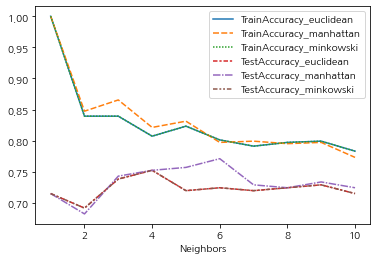

In [ ]:
sns.lineplot(data = df_accuracy_metric_pivot)
#euclidean과 minkowski는 동일하며, manhattan의 경우 이웃수가 3,4일때 차이가 있음

In [ ]:
knn_model = KNeighborsClassifier (n_neighbors = 4, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_model.score(df_train_x, df_train_y)))

# Test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_model.score(df_test_x, df_test_y)))

Accuracy on training set: 0.807
Accuracy on test set: 0.752


In [ ]:
# confusion_matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

#test 데이터 기준 정분류율은 75.2%로 기본옵션으로 생성한 모델 대비(test 데이터 기준: 72.0%)보다 개선된 것을 확인할 수 있다.
#0기준 f1-score는 63.6%, 정밀도 60.3% 재현율 68.1% .

Confusion matrix: 
[[ 47  22]
 [ 31 114]]
              precision    recall  f1-score   support

           0      0.603     0.681     0.639        69
           1      0.838     0.786     0.811       145

    accuracy                          0.752       214
   macro avg      0.720     0.734     0.725       214
weighted avg      0.762     0.752     0.756       214



## 모델 평가

In [ ]:
df_raw_x = df_raw.drop (['SCALE'], axis =1, inplace = False)
df_raw_y = df_raw['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, " Test",df_test_x.shape)

분할 전 설명변수 데이터: (712, 14)
분할 후 설명변수 데이터:Train (498, 14)  Test (214, 14)


In [ ]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'SVM', 'KNN']

train_accuracy = []; test_accuracy = []
model_auc =[]

model_precision = []; model_recall = []
model_f1_score = []

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_split=30,min_samples_leaf=10, random_state=1234)
dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

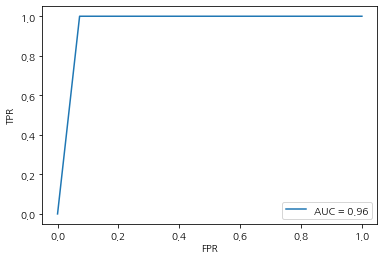

In [ ]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.show()

In [ ]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [ ]:
rf_model = RandomForestClassifier(random_state=1234,n_estimators=20,min_samples_leaf=8,
                                 max_depth=2)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


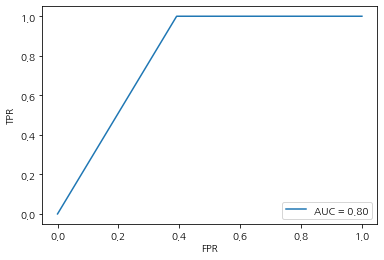

In [ ]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.show()

In [ ]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [ ]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth= 8, n_estimators=100, learning_rate=0.7, random_state=1234)
gb_final.fit(df_train_x,df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


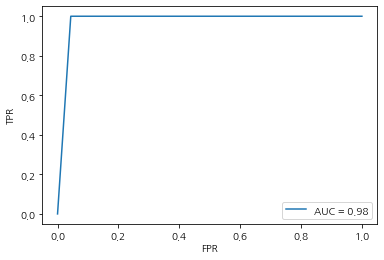

In [ ]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.show()

In [ ]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [ ]:
# scale 변환
v_feature_name=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,1.572632,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.762531,-0.958783,-0.628535,-0.403383,-0.824262,-0.114012,0.220456,-0.207012
1,1.572632,0.179403,1.735942,-1.408788,-1.105313,-0.552552,0.927436,-0.844589,-0.857776,-0.381307,-1.104983,-0.068305,0.220456,-0.207012
2,1.572632,0.234158,1.565395,-1.112551,-0.945934,-1.272568,0.762531,-1.643949,-0.781362,-0.403383,-1.891001,-0.799626,0.220456,-0.207012
3,1.572632,0.234158,1.565395,-1.112551,-0.945934,-0.168543,1.009888,-1.301366,-0.284673,0.347201,-1.497992,-0.860570,0.220456,-0.207012
4,1.572632,0.505785,0.555681,-1.537919,-1.175924,-0.744556,1.257246,-1.244269,-1.048810,0.303049,-1.217271,-1.043400,0.220456,-0.207012


In [ ]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (498, 14)
test data X size : (214, 14)


In [ ]:
svm_model =  SVC(gamma = 0.2, C = 1, random_state = 1234)
svm_model.fit(df_train_x,df_train_y)

train_accuracy.append(svm_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(svm_model.score(df_scaled_test_x, df_test_y))

y_pred = svm_model.predict(df_scaled_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


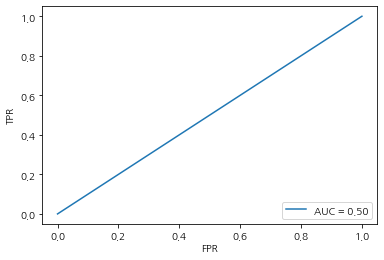

In [ ]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.show()

In [ ]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [ ]:
knn_model = KNeighborsClassifier (n_neighbors = 4, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)

train_accuracy.append(knn_model.score(df_train_x, df_train_y))
test_accuracy.append(knn_model.score(df_test_x, df_test_y))

y_pred = knn_model.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

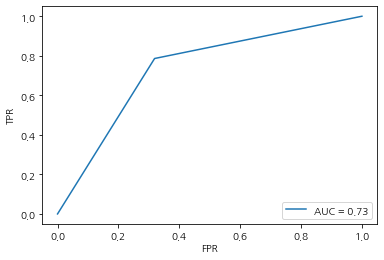

In [ ]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.show()

In [ ]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [ ]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy ; df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision; df_eval['Recall'] = model_recall
df_eval['F1 Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1 Score
DecisionTree,0.980,0.977,0.964,0.967,1.000,0.983
RandomForest,0.882,0.874,0.804,0.843,1.000,0.915
GradientBoosting,1.000,0.986,0.978,0.980,1.000,0.990
SVM,0.679,0.678,0.500,0.678,1.000,0.808
KNN,0.807,0.752,0.734,0.838,0.786,0.811


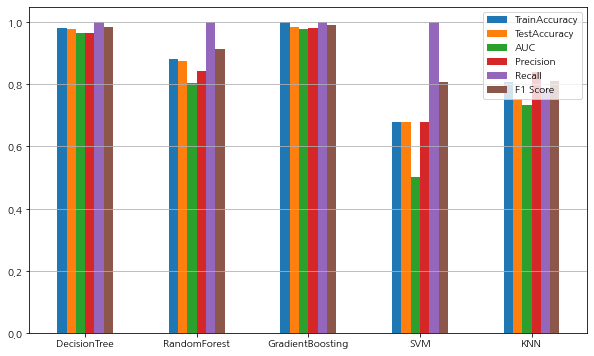

In [ ]:
df_eval.plot.bar(rot =0, figsize=(10,6))
plt.legend(loc='lower tight')
plt.grid(axis = 'y')